In [1]:
import pandas as pd
import numpy as np
import math, sys
import matplotlib.pyplot as plt

df = pd.read_csv('ML_group_project_2\\london_all_count_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df)


              ds   y
0     2018-10-01  16
1     2018-10-02  17
2     2018-10-03  13
3     2018-10-04  11
4     2018-10-05  15
...          ...  ..
1091  2021-09-26  10
1092  2021-09-27  10
1093  2021-09-28  17
1094  2021-09-29  16
1095  2021-09-30  17

[1096 rows x 2 columns]


In [2]:
import pandas as pd
import numpy as np
import math, sys
import matplotlib.pyplot as plt

#df = pd.read_csv('ML_group_project_2\\Separated_Incidents\\Borough_1.csv')
#print(df)

# 3rd Feb 2020 is a monday, 10th is following monday
start=pd.to_datetime('2018-10-01',format='%Y-%m-%d')
end=pd.to_datetime('2021-09-30',format='%Y-%m-%d')
print(df.iloc[:,0])
warry=np.array(df.iloc[:,0])
print(warry)
# convert date/time to unix timestamp in sec
t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
print(t_full)
#print(t_full[1]/(60*60*24*365))
#print(t_full[0])
#print(t_full)
dt = t_full[1] - t_full[0]
#dt_day = dt/(60*60*24)
print('data sampling interval is %d secs'%dt)
#print('data sampling interval is %d days'%dt_day)



0       2018-10-01
1       2018-10-02
2       2018-10-03
3       2018-10-04
4       2018-10-05
           ...    
1091    2021-09-26
1092    2021-09-27
1093    2021-09-28
1094    2021-09-29
1095    2021-09-30
Name: ds, Length: 1096, dtype: object
['2018-10-01' '2018-10-02' '2018-10-03' ... '2021-09-28' '2021-09-29'
 '2021-09-30']
<PandasArray>
[1538352000.0, 1538438400.0, 1538524800.0, 1538611200.0, 1538697600.0,
 1538784000.0, 1538870400.0, 1538956800.0, 1539043200.0, 1539129600.0,
 ...
 1632182400.0, 1632268800.0, 1632355200.0, 1632441600.0, 1632528000.0,
 1632614400.0, 1632700800.0, 1632787200.0, 1632873600.0, 1632960000.0]
Length: 1096, dtype: float64
data sampling interval is 86400 secs


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_9512/280130451.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000


C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_9512/1071019971.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_9512/1071019971.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


Float64Index([1538352000.0], dtype='float64')
Float64Index([1632960000.0], dtype='float64')
1096
1538352000.0
1096


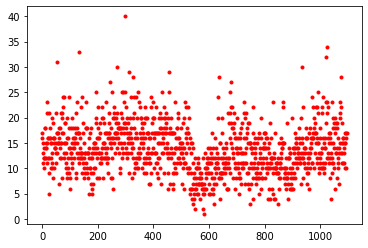

In [3]:
# extract data between start and end dates
t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
print(t_start)
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000
print(t_end)
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
t = []
y = []
counts = df.iloc[:,1]
#print(counts)
print(len(t_full))
print(t_full[0])
for i in range(len(t_full)):
    if t_full[i]>=t_start and t_full[i]<=t_end:
        days = (t_full[i]-t_full[0])/(60*60*24)
        t.append(days)
        y.append(counts[i])
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
#print(t)
#print(y)
y_size = len(y)
print(y_size)
# t=(t  - t[0])/60/60/24 # convert timestamp to days
# y = np.extract([(t_full>=t_start) & (t_full<=t_end)], df.iloc[:,1]).astype(np.int64)
# #plot extracted data
plt.scatter(t,y, color='red', marker='.'); plt.show()

In [4]:
def test_preds(q,dd,lag,plot,t,y,y_size):
    #q−step ahead prediction
    stride=1
    XX=y[0:y_size - q - lag*dd:stride]
    # print('XX',type(XX[0]))
    # print('XX',XX)
    # print('XX',XX[0])
    for i in range(1,lag):
        X=y[i*dd:y_size - q - (lag - i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]
    XX = np.array(XX, dtype=np.int64)
    yy = np.array(yy, dtype=np.int64)
    tt = np.array(tt, dtype=np.int64)
    #XX.astype(int); yy.astype(int); tt.astype(int);
    yy_size = len(yy)
    #print('yy',type(yy[0]))
    #print('yy',yy[0])
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
    #print('train',train) 
    #print('test',type(test))
    from sklearn.linear_model import Ridge
    model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
    print(model.intercept_)
    print(model.coef_)
    print(model.coef_[0])
    if plot:
        y_pred = model.predict(XX)
        new_pred = np.zeros(len(y_pred))
        from math import isclose
        coefs = model.coef_
        # print(sum(coefs))
        # for i in range(len(y_pred)):
        #     if y_pred[i]==0 or isclose(y_pred[i],coefs[0],rel_tol=1e-05) or isclose(y_pred[i],coefs[1],rel_tol=1e-05):
        #         new_pred[i] = 0
        #         print('value was coef 1 or 0')
        #     elif isclose(y_pred[i],coefs[2],rel_tol=1e-05):
        #         new_pred[i] = 1
        #         print('value was coef 3')
        #     elif y_pred[i] > (sum(coefs)):
        #         new_pred[i] = 2
        #         if y_pred[i] > (sum(coefs)+.5*(sum(coefs))):
        #             new_pred[i] = 3
        #     elif y_pred[i] > (coefs[0]+coefs[2]) or y_pred[i] > (coefs[1]+coefs[2]):
        #         new_pred[i] = 1
        #     else: 
        #         new_pred[i] = 0 
        #         # new_pred[i] = y_pred[i]
        #         # print(new_pred[i])
        print(len(y_pred),len(new_pred))
        print('yy vs y_pred 0 count vs new pred count: ', len(yy[yy==0]),len(y_pred[y_pred==0]), len(new_pred[new_pred==0]))
        print('yy vs 1 new pred count: ', len(yy[yy==1]), len(new_pred[new_pred==1]))
        print('count of 2s', len(yy[yy==2]), len(new_pred[new_pred==2]))
        plt.scatter(t, y, color='black',marker='.'); plt.scatter(tt, y_pred, color='blue',marker='.')
        #plt.scatter(t, y, color='black'); plt.scatter(np.array(df.iloc[:,0]), new_pred, color='blue')
        plt.title('Predictions for all of London')
        plt.xlabel('time (days)'); plt.ylabel('#incidents')
        plt.legend(['training data','predictions'],loc='upper right')
        day=math.floor(24*60*60/dt) # number of samples per day
        #plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
        #plt.xlim(len(t))
        #plt.ylim(0,2)
        print(y_pred)
        print(new_pred)
        plt.show()

0.0
[0.38685314 0.28019599 0.28316582]
0.3868531437642773
1083 1083
yy vs y_pred 0 count vs new pred count:  0 0 1083
yy vs 1 new pred count:  1 0
count of 2s 2 0
[14.63413787 13.3338754  12.35873413 ... 13.76268393 14.81658621
 13.78761023]
[0. 0. 0. ... 0. 0. 0.]


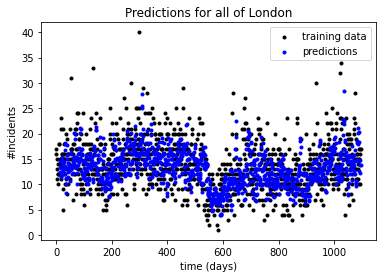

0.0
[0.30244619 0.27753906 0.39007183]
0.30244618741737533
1092 1092
yy vs y_pred 0 count vs new pred count:  0 0 1092
yy vs 1 new pred count:  1 0
count of 2s 2 0
[14.62823685 13.04038313 12.8358076  ... 13.20538942 11.21280175
 12.43107364]
[0. 0. 0. ... 0. 0. 0.]


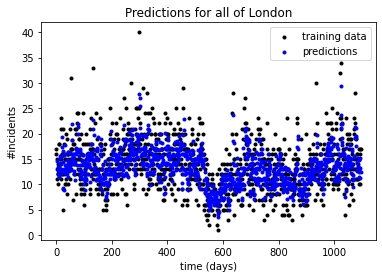

0.0
[0.2731805  0.34017121 0.36073059]
0.27318049584241144
1068 1068
yy vs y_pred 0 count vs new pred count:  0 0 1068
yy vs 1 new pred count:  1 0
count of 2s 2 0
[13.18355896 13.05489011 13.64246483 ... 14.79695991 15.11125916
 14.80698908]
[0. 0. 0. ... 0. 0. 0.]


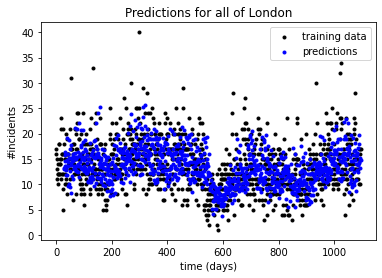

0.0
[0.29013011 0.32522363 0.35449078]
0.2901301054903962
1068 1068
yy vs y_pred 0 count vs new pred count:  0 0 1068
yy vs 1 new pred count:  1 0
count of 2s 2 0
[13.21167975 13.08878478 13.52511537 ... 14.57097333 14.91963773
 14.5031924 ]
[0. 0. 0. ... 0. 0. 0.]


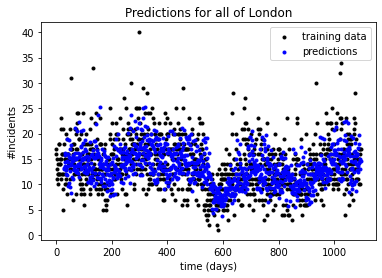

In [5]:
# prediction using short−term trend
plot=True
test_preds(q=10,dd=1,lag=3,plot=plot,t=t,y=y, y_size=y_size)
# prediction using daily seasonality
d=math.floor(24*60*60/dt) # number of samples per day
test_preds(q=d,dd=d,lag=3,plot=plot,t=t,y=y, y_size=y_size)
# prediction using weekly seasonality
w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size)
# prediction using monthly seasonality
w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size)

C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_25632/3888910872.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_25632/3888910872.py:14: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
C:\Users\MATTHE~1\AppData\Local\Temp/ipykernel_25632/3888910872.py:16: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000


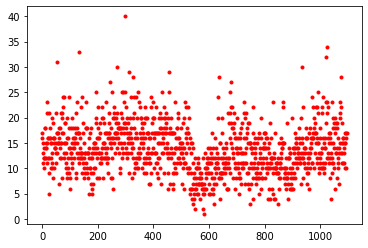

0.0
[0.27667441 0.34486881 0.34582241]
0.27667440600010074
1068 1068
yy vs y_pred 0 count vs new pred count:  0 0 1068
yy vs 1 new pred count:  1 0
count of 2s 2 0
[13.0628148  12.99175959 13.60845243 ... 14.77944768 15.05802929
 14.71117089]
[0. 0. 0. ... 0. 0. 0.]


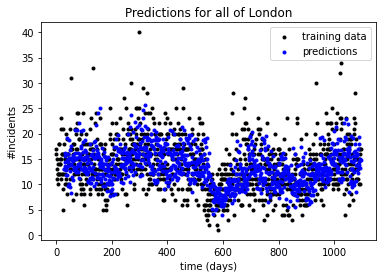

In [6]:
df = pd.read_csv('ML_group_project_2\\london_all_count_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
start=pd.to_datetime('2018-10-01',format='%Y-%m-%d')
end=pd.to_datetime('2021-09-30',format='%Y-%m-%d')
# convert date/time to unix timestamp in sec
t_full=pd.array(pd.DatetimeIndex(df.iloc[:,0]).astype(np.int64))/1000000000
dt = t_full[1] - t_full[0]
#dt_day = dt/(60*60*24)
#print('data sampling interval is %d secs'%dt)
#print('data sampling interval is %d days'%dt_day)


# extract data between start and end dates
t_start = pd.DatetimeIndex([start]).astype(np.int64)/1000000000
#print(t_start)
t_end = pd.DatetimeIndex([end]).astype(np.int64)/1000000000
#print(t_end)
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
t = []
y = []
counts = df.iloc[:,1]
#print(counts)
#print(len(t_full))
#print(t_full[0])
for i in range(len(t_full)):
    if t_full[i]>=t_start and t_full[i]<=t_end:
        days = (t_full[i]-t_full[0])/(60*60*24)
        t.append(days)
        y.append(counts[i])
#t = np.extract([(t_full>=t_start) & (t_full<=t_end)], t_full)
#print(t)
#print(y)
y_size = len(y)
#print(y_size)
# t=(t  - t[0])/60/60/24 # convert timestamp to days
# y = np.extract([(t_full>=t_start) & (t_full<=t_end)], df.iloc[:,1]).astype(np.int64)
# #plot extracted data
plt.scatter(t,y, color='red', marker='.'); plt.show()

w=math.floor(7*24*60*60/dt) # number of samples per day
test_preds(q=w,dd=w,lag=3,plot=plot,t=t,y=y, y_size=y_size)

[ 8 16 19 ... 17 16 17]
[[18 15  5 ... 16 17 13]
 [12 21 12 ... 17 13 11]
 [14 23 21 ... 13 11 15]
 ...
 [11 23 11 ... 17 13 13]
 [12 21 13 ... 13 13 19]
 [ 7 22 15 ... 13 19  8]]
0.0511499086844468
0.0 [0.05124829 0.22549965 0.1784708  0.05124829 0.13987236 0.04181403
 0.13346646 0.06580791 0.09535945]
1058
38
1096
1096
accuracy 0.0831758034026465


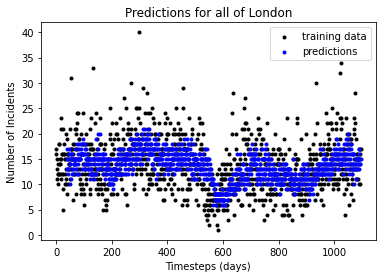

In [7]:
#putting it together
from sklearn.metrics import accuracy_score
q=10
lag=3; stride=1
w=math.floor(7*24*60*60/dt) # number of samples per week
length = y_size - w - lag*w -q
XX=y[q:q+length:stride]
for i in range(1,lag):
    X=y[i*w+q:i*w+q+length:stride]
    XX=np.column_stack((XX,X))
d=math.floor(24*60*60/dt) # number of samples per day
for i in range(0,lag):
    X=y[i*d+q:i*d+q+length:stride]
    XX=np.column_stack((XX,X))
for i in range(0,lag):
    X=y[i:i+length:stride]
    XX=np.column_stack((XX,X))
yy=y[lag*w+w+q:lag*w+w+q+length:stride]
tt=t[lag*w+w+q:lag*w+w+q+length:stride]
XX = np.array(XX, dtype=np.int64)
yy = np.array(yy, dtype=np.int64)
tt = np.array(tt, dtype=np.int64)
print(yy)
print(XX)
yy_size=len(yy)
from sklearn.model_selection import train_test_split
train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
#train = np.arange(0,yy.size)
from sklearn.linear_model import Ridge
#Ci_range = [0.01, 0.1, 1, 10, 100, 1000] 
#Ci_range = [ 10, 100, 1000] 
# for Ci in Ci_range:
#     print('C Value: ', Ci)
#     model = Ridge(alpha=1/(2*Ci),fit_intercept=False).fit(XX[train], yy[train])
model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
print(model.score(XX[test],yy[test]))
print(model.intercept_, model.coef_)
print(len(yy))
if plot:
    y_pred = model.predict(XX)
    for i in range(len(y_pred)):
        y_pred[i] = round(y_pred[i])
    diff = len(y)-len(y_pred)
    print(diff)
    print(len(y))
    y_temp = list(y)
    for i in range(diff):
        y_temp.pop(0)
    print(len(y))
    print('accuracy', accuracy_score(y_temp,y_pred))
    plt.scatter(t, y, color='black',marker='.'); plt.scatter(tt, y_pred, color='blue',marker='.')
    plt.title('Predictions for all of London')
    #plt.scatter(Xtest,predictions, color = 'green', marker = '.')
    plt.xlabel('Timesteps (days)'); plt.ylabel('Number of Incidents')
    plt.legend(['training data','predictions'],loc='upper right')
    day=math.floor(24*60*60/dt) # number of samples per day
    # plt.xlim((4*7,4*7+4))
    plt.show()

C Value:  0.01
[16, 17, 13, 11, 15, 12, 14, 10, 12, 18, 18, 12, 14, 14, 15, 12, 11, 15, 21, 23, 12, 16, 16, 9, 5, 12, 21, 16, 18, 16, 10, 12, 15, 15, 11, 13, 20, 10, 8, 16, 19, 16, 16, 10, 15, 14, 14, 14, 21, 11, 13, 15, 17, 17, 31, 13, 15, 15, 17, 15, 16, 18, 7, 12, 14, 18, 12, 15, 21, 15, 17, 20, 8, 21, 22, 24, 17, 24, 12, 15, 13, 19, 19, 15, 10, 11, 15, 13, 8, 16, 20, 9, 16, 10, 12, 24, 14, 9, 18, 6, 14, 8, 13, 12, 18, 13, 11, 10, 15, 20, 14, 16, 18, 14, 12, 15, 16, 15, 18, 16, 9, 8, 17, 21, 18, 13, 23, 15, 12, 17, 17, 33, 17, 13, 11, 14, 16, 12, 22, 13, 13, 12, 9, 12, 13, 24, 17, 19, 11, 10, 15, 12, 8, 13, 9, 13, 11, 23, 18, 18, 18, 13, 10, 9, 8, 13, 13, 16, 5, 14, 12, 10, 10, 17, 9, 18, 7, 12, 6, 5, 13, 12, 14, 7, 9, 15, 13, 15, 10, 15, 10, 14, 13, 19, 25, 20, 12, 8, 16, 14, 16, 18, 22, 13, 16, 8, 13, 17, 19, 11, 11, 12, 13, 12, 22, 14, 20, 12, 15, 20, 8, 12, 15, 15, 19, 14, 17, 12, 17, 23, 13, 12, 12, 17, 14, 11, 12, 16, 9, 19, 17, 21, 17, 27, 16, 15, 15, 8, 14, 18, 25, 16, 8, 12

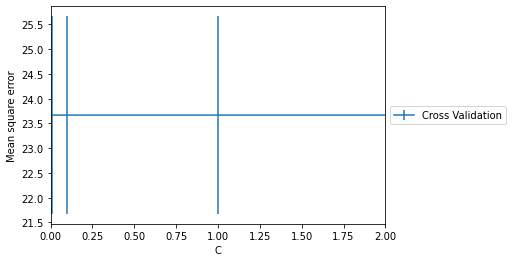

In [28]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
mean_error=[]; std_error=[]
Ci_range = [0.01, 0.1, 1, 10, 100, 1000] 
for Ci in Ci_range:
    print('C Value: ', Ci)
    model=Ridge(alpha=1/(2*Ci),fit_intercept=False)
    temp=[]
    kf = KFold(n_splits=5)
    for train, test in kf.split(XX):
        model.fit(XX[train], yy[train])
        ypred = model.predict(XX[test])
        ypred = np.array(ypred)
        #print(ypred)
        print(y)
        print(test)
        print(type(test))
        print(type(test[1]))
        test = np.array(test)
        #print(y[test])
        temp.append(mean_squared_error(yy[test],ypred))
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    #print('intercept %f, square error %f' %(model.intercept_, mean_squared_error(y[test],ypred)))
    #print('coefficients', model.coef_)
    #print(np.shape(ypred))
    #print(np.shape(y[test]))
plt.errorbar(Ci_range,mean_error,yerr=std_error, label="Cross Validation")
plt.legend(bbox_to_anchor=(1,0.5),ncol=1, loc='center left')
plt.xlabel('C'); plt.ylabel('Mean square error')
plt.xlim((0,2))
plt.show()
###################

In [93]:
def test_preds(q,dd,lag,plot,t,y,y_size):
    #q−step ahead prediction
    stride=1
    XX=y[0:y_size - q - lag*dd:stride]
    # print('XX',type(XX[0]))
    # print('XX',XX)
    # print('XX',XX[0])
    for i in range(1,lag):
        X=y[i*dd:y_size - q - (lag - i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]
    XX = np.array(XX, dtype=np.int64)
    yy = np.array(yy, dtype=np.int64)
    tt = np.array(tt, dtype=np.int64)
    #XX.astype(int); yy.astype(int); tt.astype(int);
    yy_size = len(yy)
    #print('yy',type(yy[0]))
    #print('yy',yy[0])
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
    #print('train',train) 
    #print('test',type(test))
    from sklearn.linear_model import Ridge
    model = Ridge(fit_intercept=False).fit(XX[train], yy[train])
    print(model.intercept_)
    print(model.coef_)
    print(model.coef_[0])
    if plot:
        y_pred = model.predict(XX)
        # for i in range(len(y_pred)):
        #     if y_pred[i]==0
        print('yy vs y_pred 0 count: ', len(yy[yy==0]),len(y_pred[y_pred==0]))
        plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred, color='blue')
        plt.xlabel('time (days)'); plt.ylabel('#incidents')
        plt.legend(['training data','predictions'],loc='upper right')
        day=math.floor(24*60*60/dt) # number of samples per day
        #plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
        #plt.xlim(len(t))
        plt.ylim(0,2)
        print(y_pred)
        plt.show()

In [13]:
def test_preds(q,dd,lag,plot,t,y,y_size):
    #q−step ahead prediction
    stride=1
    XX=y[0:y_size - q - lag*dd:stride]
    # print('XX',type(XX[0]))
    # print('XX',XX)
    # print('XX',XX[0])
    for i in range(1,lag):
        X=y[i*dd:y_size - q - (lag - i)*dd:stride]
        XX=np.column_stack((XX,X))
    yy=y[lag*dd+q::stride]; tt=t[lag*dd+q::stride]
    XX = np.array(XX, dtype=np.int64)
    yy = np.array(yy, dtype=np.int64)
    tt = np.array(tt, dtype=np.int64)
    #XX.astype(int); yy.astype(int); tt.astype(int);
    yy_size = len(yy)
    #print('yy',type(yy[0]))
    #print('yy',yy[0])
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(np.arange(0,yy_size),test_size=0.2)
    #print('train',train) 
    #print('test',type(test))
    from sklearn.linear_model import Ridge
    Ci_range = [0.01, 0.1, 1, 10, 100, 1000] 
    #Ci_range = [ 10, 100, 1000] 
    for Ci in Ci_range:
        print('C Value: ', Ci)
        model = Ridge(alpha=1/(2*Ci),fit_intercept=False).fit(XX[train], yy[train])
        print(model.intercept_)
        print(model.coef_)
        print(model.coef_[0])
        if plot:
            y_pred = model.predict(XX)
            # for i in range(len(y_pred)):
            #     if y_pred[i]==0
            print('yy vs y_pred 0 count: ', len(yy[yy==0]),len(y_pred[y_pred==0]))
            plt.scatter(t, y, color='black'); plt.scatter(tt, y_pred, color='blue')
            plt.xlabel('time (days)'); plt.ylabel('#incidents')
            plt.legend(['training data','predictions'],loc='upper right')
            day=math.floor(24*60*60/dt) # number of samples per day
            #plt.xlim(((lag*dd+q)/day,(lag*dd+q)/day+2))
            #plt.xlim(len(t))
            plt.ylim(0,2)
            print(y_pred)
            plt.show()